(-0.5, 1079.5, 1079.5, -0.5)

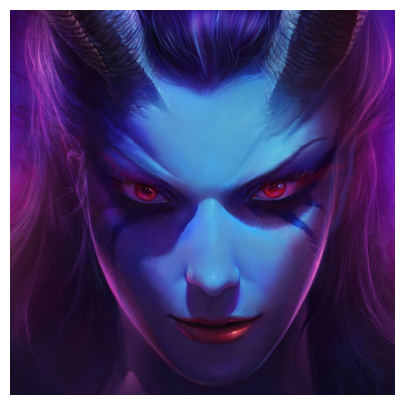

In [9]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams[ 'figure.figsize'] = [5,5]
plt.rcParams.update({'font.size':18})

A = imread(os.path.join('/QOP, square image.jpg'))
B = np.mean(A,-1); # convert to grayscale

plt.figure()
plt.imshow(A)
plt.axis('off')

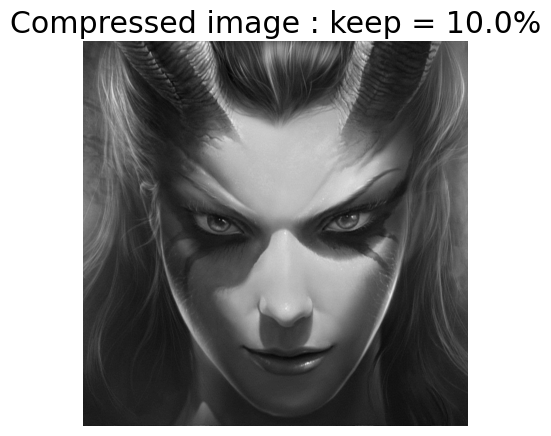

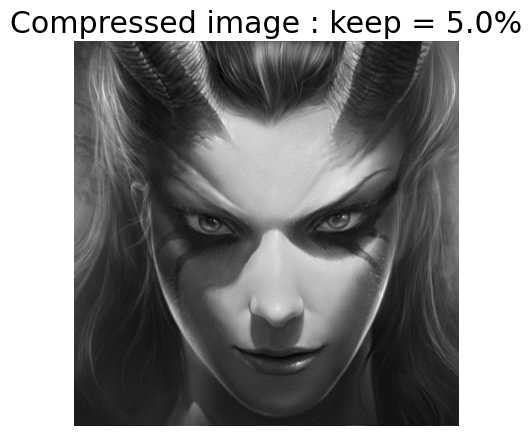

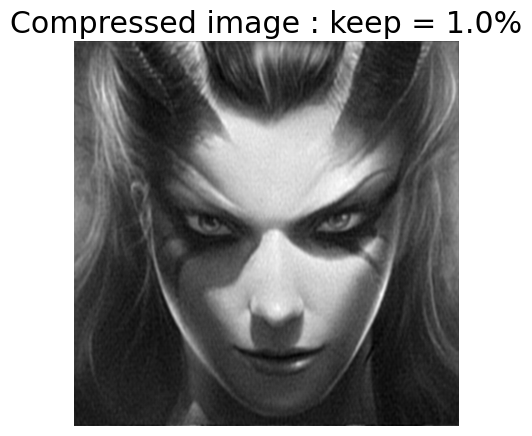

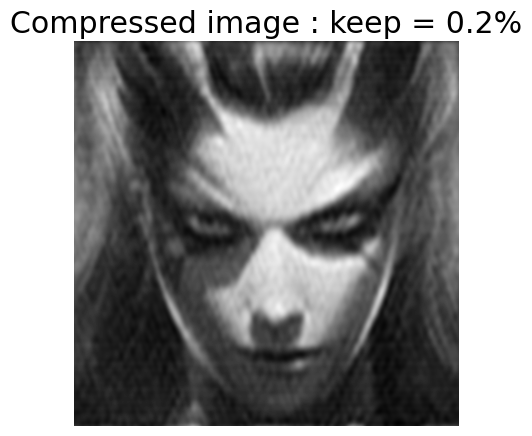

In [10]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) #sort by magnitude

#Zero out all the small coeffecients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh      #find small indices
    Atlow = Bt * ind             #threshold small indices
    Alow = np.fft.ifft2(Atlow).real    #compressed image

    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image : keep = ' + str(keep*100) + '%' )

